In [3]:
import os
import glob

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score
from rdkit import DataStructs
from rdkit.Chem import AllChem, rdFingerprintGenerator, Draw
from rdkit import Chem
from rdkit.DataStructs import BulkTanimotoSimilarity

import matplotlib.pyplot as plt
import seaborn as sns

### 1. Tanimoto similarity (similar molecules) - validation vs training datasets

In [4]:
# Full dataset as used by the authors
ldtoxdb = pd.read_csv('../../data/full_dataset_with_stereo.csv')

In [5]:
# Generate fingerprints
all_smiles = ldtoxdb['smi'].unique()

# Morgan generator
morgan_generator = rdFingerprintGenerator.GetMorganGenerator(radius=2)

mol_fps = [morgan_generator.GetCountFingerprint(AllChem.MolFromSmiles(smiles)) for smiles in all_smiles]

#### 1.1 How 'similar' is the dataset 

In [6]:
results_sim = []

# Calculate Tanimoto similarity for each pair of fingerprints
for i in range(len(mol_fps)):
    for j in range(len(mol_fps)):
        if i != j:  # Avoid self-comparison
            similarity = DataStructs.TanimotoSimilarity(mol_fps[i], mol_fps[j])
            results_sim.append({'smile1': all_smiles[i], 'smile2': all_smiles[j], 'similarity': similarity})

# Convert results to a DataFrame
similarity = pd.DataFrame(results_sim)

In [ ]:
sim1 = similarity[similarity['similarity']==1]

smile1                                                                                                                               smile2                                                                                                                                                                                                   similarity
Br/C=C/c1ccccc1                                                                                                                      BrC=Cc1ccccc1                                                                                                                                                                                            1.0           1
COC1CC(O[C@@H]2[C@@H](C)C(=O)O[C@H](C)[C@H](C)[C@H](O)[C@@H](C)C(=O)[C@@]3(CO3)C[C@H](C)[C@H](OC3OC(C)CC(N(C)C)C3O)[C@H]2C)OC(C)C1O  COC1CC(OC2C(C)C(=O)OC(C)C(C)C(O)C(C)C(=O)C3(CO3)CC(C)C(OC3OC(C)CC(N(C)C)C3O)C2C)OC(C)C1O                                                                                    

In [10]:
len(sim1)

2440

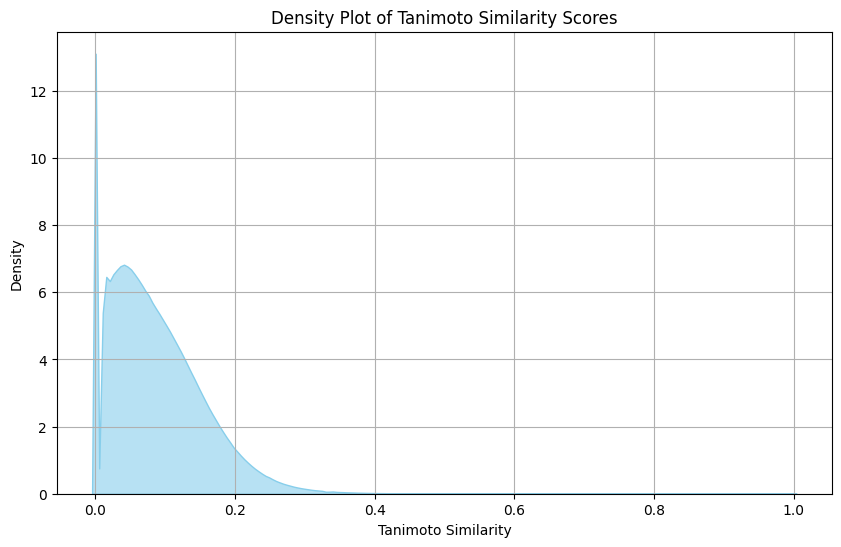

In [8]:
plt.figure(figsize=(10, 6))

# Use seaborn to create the density plot
sns.kdeplot(data=similarity['similarity'], fill=True, color='skyblue', alpha=0.6)

# Add labels and title
plt.xlabel('Tanimoto Similarity')
plt.ylabel('Density')
plt.title('Density Plot of Tanimoto Similarity Scores')

# Show the grid
plt.grid(True)

# Show the plot
plt.show()